<center>
<div class="alert alert-block alert-info">
    <h1> </h1>
    <h1><font size="+3"> <b> Math340 HW10 </b> </font></h1>
    <h1><font size="+3"> <b> Programming in Mathematics </b> </font></h1>
    <h1><font size="+3"> <b> Due 4/25/25  </b> </font></h1>
    
</div>
</center>

<br>



<center>
<font size="+2">
Department of Mathematics and Statistics <br> <br>
San Diego State University <br> <br>
Spring 2025
</font>
</center>








## Your Name: Victor Allen 

## Your ID: 132107570

## 1. Summary

1. Solved the differential equaiton for different values of sigma delta t and plotted them. 

2. Applied forward, backward and central finite different schemes to approxomate the derviate of the equation and plotted the assigned results. 

3. Discussed the differecnes between discrete and continouls solutions to a diff eq and when each might be useful. 

4. Showed how sensitive an ill-conditioned equation is to small pertubations. 

## 2. Methodology

1. I defined all the varaibles and wrote a list witht he sigma dt values, then I wrote a loop and solved the equation for each value, then plotted the results in their own graph. 

2. I found and defined the equaitions and parameters, then applied the schemes to approximate the functions derivative. Plotted the solutions of U and V, then plotted the approximated derivatives. Created a panel for the growth of the function using the formula and created a panel for them along with the reference. 

3. See Discussion. 

4. Found the analytical solution for the system using sympy then I introduced a small pertubation and analyzed its effect on the solutions, and how sensitive the solutions were to that pertubaiton. 

## 3. Code and Results (e.g., Tables, Figures, Outputs)

### Results for Question 1 (within a Markdown cell)

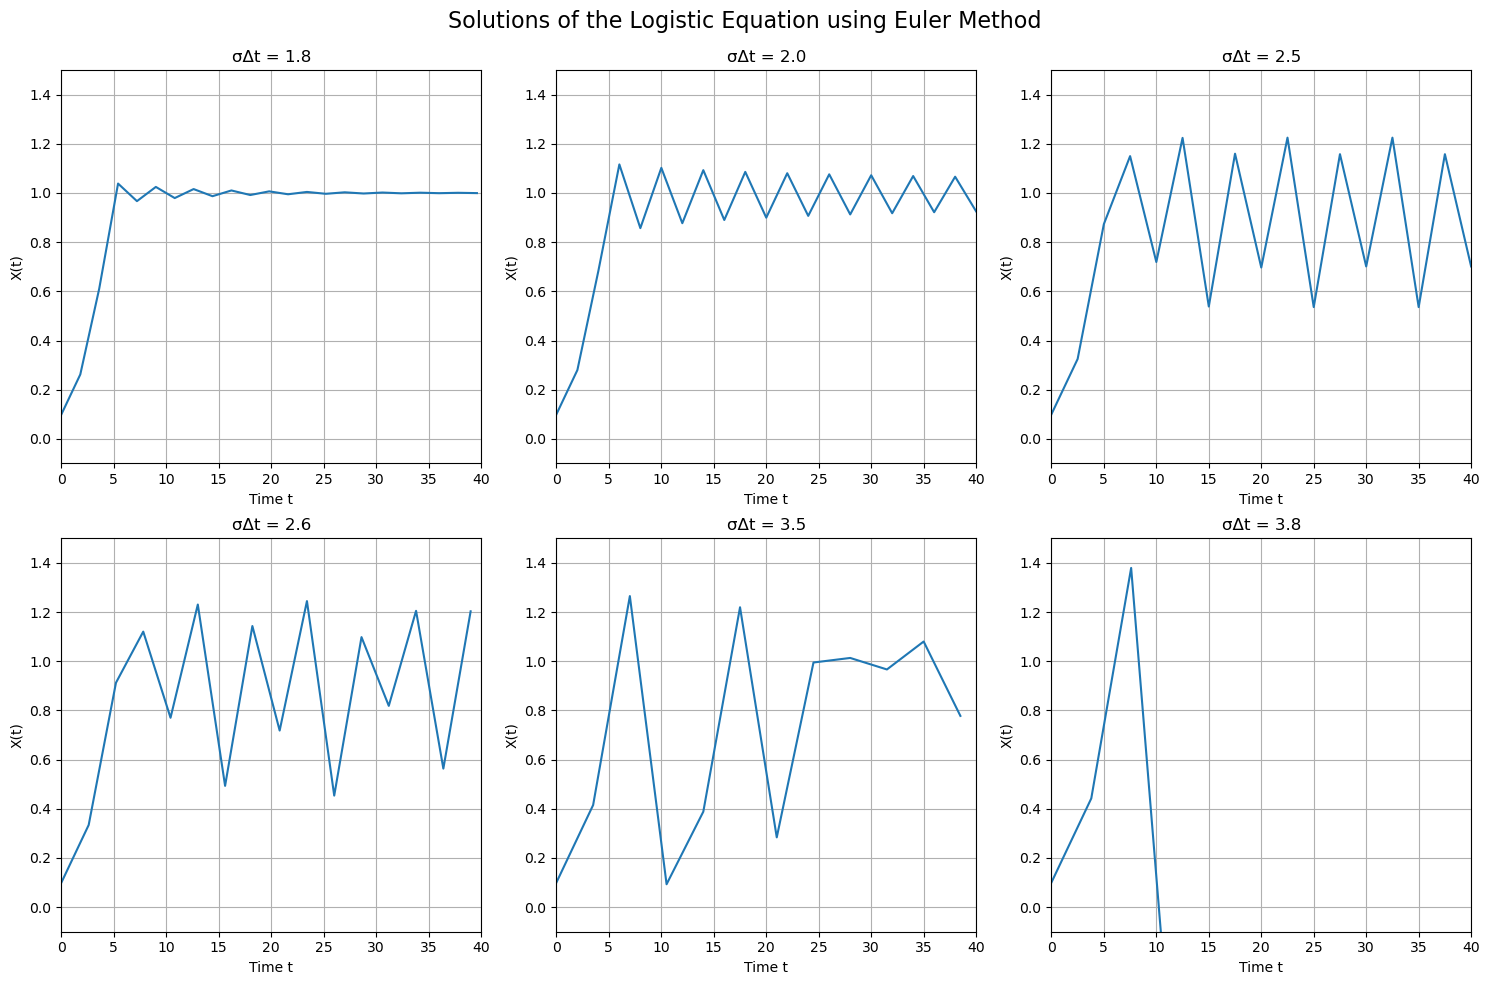

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X0 = .1
tMax = 40
sigmaDtValues = [1.8, 2.0, 2.5, 2.6, 3.5, 3.8]

plt.figure(figsize=(15,10))

for i , sigmaDt in enumerate(sigmaDtValues):

    sigma = 1
    dt = sigmaDt / sigma

    nSteps = int(tMax / dt)

    t = np.zeros(nSteps + 1)
    X = np.zeros(nSteps + 1)

    X[0] = X0

    for j in range(nSteps):
        t[j+1] = t[j] + dt
        X[j+1] = X[j] + dt * sigma * X[j] * ( 1 - X[j])

    plt.subplot(2,3,i+1)

    plt.plot(t, X)
    plt.xlabel('Time t')
    plt.ylabel('X(t)')
    plt.title(f'σΔt = {sigmaDt}')
    plt.grid(True)
    plt.xlim(0, tMax)
    plt.ylim(-0.1, 1.5) 

plt.tight_layout()
plt.suptitle('Solutions of the Logistic Equation using Euler Method', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()






### Results for Question 2 (within a Markdown cell)

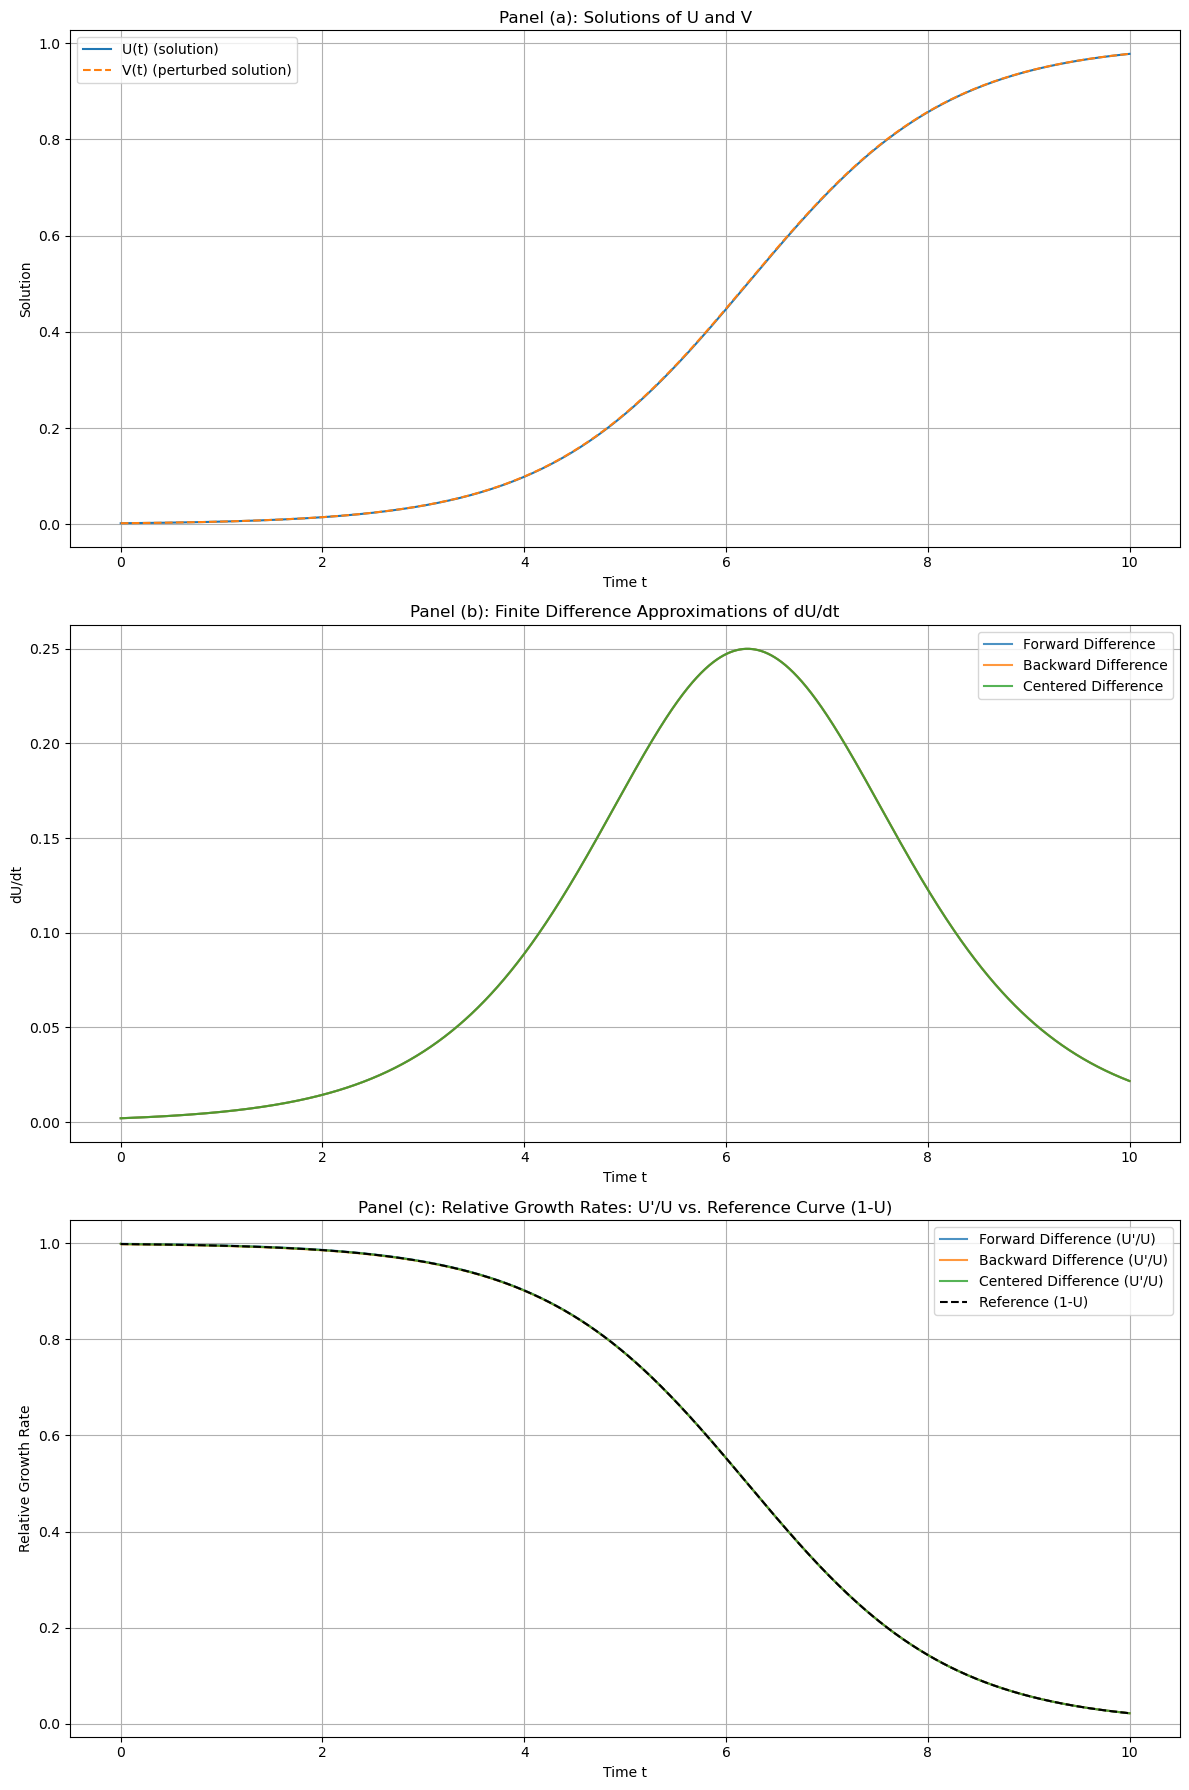

In [29]:
import numpy as np
import matplotlib.pyplot as plt


T = 10              
dt = 0.001           
t = np.arange(0, T + dt, dt)  

sigma = 1.0   
u0 = 0.002        
epsilon = 1e-5  
v0 = u0 + epsilon  


U = u0 * np.exp(sigma * t) / (1 - u0 + u0 * np.exp(sigma * t))
V = v0 * np.exp(sigma * t) / (1 - v0 + v0 * np.exp(sigma * t))


dU_forward = np.zeros_like(U)
dU_backward = np.zeros_like(U)
dU_centered = np.zeros_like(U)


dU_forward[:-1] = (U[1:] - U[:-1]) / dt
dU_forward[-1] = (U[-1] - U[-2]) / dt  

dU_backward[0] = (U[1] - U[0]) / dt 
dU_backward[1:] = (U[1:] - U[:-1]) / dt


dU_centered[0] = (U[1] - U[0]) / dt   
dU_centered[-1] = (U[-1] - U[-2]) / dt
dU_centered[1:-1] = (U[2:] - U[:-2]) / (2 * dt)


rel_forward = dU_forward / U
rel_backward = dU_backward / U
rel_centered = dU_centered / U


rel_reference = 1 - U

fig, axs = plt.subplots(3, 1, figsize=(12, 18))

axs[0].plot(t, U, label='U(t) (solution)')
axs[0].plot(t, V, label='V(t) (perturbed solution)', linestyle='--')
axs[0].set_title('Panel (a): Solutions of U and V')
axs[0].set_xlabel('Time t')
axs[0].set_ylabel('Solution')
axs[0].legend()
axs[0].grid(True)

axs[1].plot(t, dU_forward, label='Forward Difference', alpha=0.8)
axs[1].plot(t, dU_backward, label='Backward Difference', alpha=0.8)
axs[1].plot(t, dU_centered, label='Centered Difference', alpha=0.8)
axs[1].set_title('Panel (b): Finite Difference Approximations of dU/dt')
axs[1].set_xlabel('Time t')
axs[1].set_ylabel("dU/dt")
axs[1].legend()
axs[1].grid(True)


axs[2].plot(t, rel_forward, label="Forward Difference (U'/U)", alpha=0.8)
axs[2].plot(t, rel_backward, label="Backward Difference (U'/U)", alpha=0.8)
axs[2].plot(t, rel_centered, label="Centered Difference (U'/U)", alpha=0.8)
axs[2].plot(t, rel_reference, 'k--', label='Reference (1-U)')
axs[2].set_title("Panel (c): Relative Growth Rates: U'/U vs. Reference Curve (1-U)")
axs[2].set_xlabel('Time t')
axs[2].set_ylabel("Relative Growth Rate")
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()



### Results for Question 3 (within a Markdown cell)

a.

The continuous solution evolves smoothly and continously over time, and is characteristic of many natural processes where changes occur gradually. It is also governed by a function that guarantees a well - behavied sigmoid curve, and approaces its asymtotes gradually. 

The discrete version is represented by an iteration rather than a smooth functions. For small iterations, the discrete approximation is very close to the continous version, but if the iteration is too large, it can diverge from the continous solution. It might be more natural to use the discrete formula in real world applicaions where data is sampled. 

If the process you are modeling is natrually continous, then the continous model might be a better fit. Likeqise if the system is overved, or controlled at discrete time points, it would make more sense to use the discrete model. It is still essential to choose a small iteration to minimize error and to capture the essense of the continous function. This is where an error analysis can be useful. In situaitons where the compuatational setup is iterative, like in neural network training, the discrete model is directly applicable, but if you have to predict or analyze long term trends or dynamics, the continous model would be better. 

b. 

Backprop typically involves dicrete updates over mini batches, or indiv data points. In this situation the discrete form serves an an approximation to the continuous derivative. An imprecise approximaiton because of a large delta X may lead to innaccuracies in the computed gradients. 

When computed discretley, errors in the approximation can lead to vanishing or exploding gradients. If the dicretizaiton underestimates the true gradient, the weight updates may become negligable. Convesley and overestimated gradient can cause weight updates that are too large. 

The logistic equaiton is also nearly linear at a = 0, and a = 1. In backprop if the activation values approach these values, the gradient signal can weacken, becasue the value becomes too small. 

### Question 4

a.

In [13]:
import numpy as np
import sympy as sp

x,y = sp.symbols('x y')

eq1 = sp.Eq(.9999*x - 1.0001*y,1)

eq2 = sp.Eq(x - y , 1)

sol = sp.solve((eq1,eq2),(x,y))

print(f"Analytical Solution:\nx = {sol[x]}\ny = {sol[y]}")

A = np.array([[0.9999, -1.0001], [1, -1]])

b = np.array([1,1])

condNum = np.linalg.cond(A)

print(f"\nCondition number of A: {condNum}")

numericalSol = np.linalg.solve(A,b)
print(f"\nNumerical Solution:\nx = {numericalSol[0]}\ny = {numericalSol[1]}")

residual1 = 0.9999 * numericalSol[0] - 1.0001 * numericalSol[1] - 1
residual2 = numericalSol[0] - numericalSol[1] - 1
print(f"\nResiduals (should be close to zero):\nEquation 1 residual: {residual1}\nEquation 2 residual: {residual2}")

Analytical Solution:
x = 0.500000000000000
y = -0.500000000000000

Condition number of A: 20000.000049995837

Numerical Solution:
x = 0.5
y = -0.5

Residuals (should be close to zero):
Equation 1 residual: 0.0
Equation 2 residual: 0.0


b.

Original Solution:
x = 0.5
y = -0.5

Perturbed System, Right hand side:
Equations:
0.9999x - 1.0001y = 1.0001
x - y = 1
Solution: x = 0.0, y = -1.0

Relative change in input: 0.000071
Relative change in output: 1.000000
Amplification factor: 14142.14

Perturbed system (coefficient matrix):
Equations:
1.0x - 1.0001y = 1
x - y = 1
Solution: x = 1.0, y = 0.0


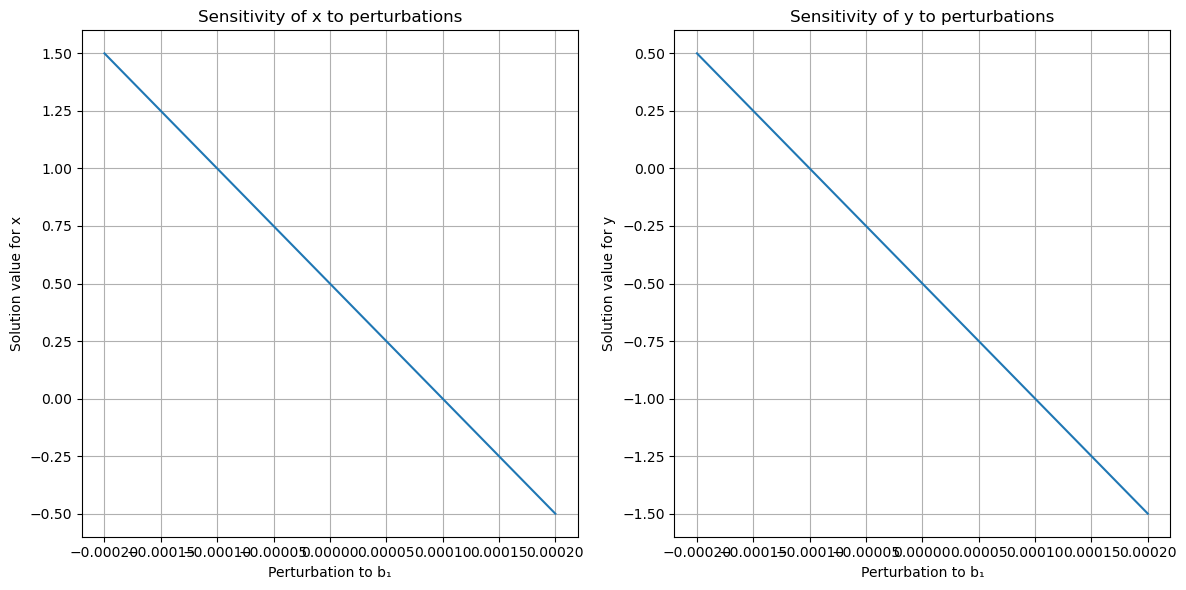

In [30]:
import numpy as np
import matplotlib.pyplot as plt

AOrig = np.array([[0.9999, -1.0001], [1, -1]])

bOrig = np.array([1, 1])

solOrig = np.linalg.solve(AOrig, bOrig)

print(f"Original Solution:\nx = {solOrig[0]}\ny = {solOrig[1]}")

perturbation = .0001

bPer = np.array([1 + perturbation, 1])

solPer = np.linalg.solve(AOrig, bPer)

print(f"\nPerturbed System, Right hand side:\nEquations:\n0.9999x - 1.0001y = {bPer[0]}\nx - y = 1\nSolution: x = {solPer[0]}, y = {solPer[1]}")

relChangeInput = perturbation / np.linalg.norm(bOrig)
relChangeOutput = np.linalg.norm(solPer - solOrig) / np.linalg.norm(solOrig)

print(f"\nRelative change in input: {relChangeInput:.6f}")
print(f"Relative change in output: {relChangeOutput:.6f}")
print(f"Amplification factor: {relChangeOutput/relChangeInput:.2f}")

A_perturbed = np.array([[0.9999 + perturbation, -1.0001], [1, -1]])
solution_perturbed_A = np.linalg.solve(A_perturbed, bOrig)

print("\nPerturbed system (coefficient matrix):")
print(f"Equations:\n{A_perturbed[0,0]}x - 1.0001y = 1\nx - y = 1")
print(f"Solution: x = {solution_perturbed_A[0]}, y = {solution_perturbed_A[1]}")

# Visualize the sensitivity
perturbation_values = np.linspace(-0.0002, 0.0002, 100)
x_solutions = []
y_solutions = []

for pert in perturbation_values:
    b_pert = np.array([1 + pert, 1])
    solution = np.linalg.solve(AOrig, b_pert)
    x_solutions.append(solution[0])
    y_solutions.append(solution[1])

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(perturbation_values, x_solutions)
plt.xlabel('Perturbation to b₁')
plt.ylabel('Solution value for x')
plt.title('Sensitivity of x to perturbations')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(perturbation_values, y_solutions)
plt.xlabel('Perturbation to b₁')
plt.ylabel('Solution value for y')
plt.title('Sensitivity of y to perturbations')
plt.grid(True)

plt.tight_layout()
plt.savefig('sensitivity_analysis.png', dpi=300)
plt.show()